# **5. Estadística Inferencial**

# **I. Gestión de directorios y archivos en la nube**

La gestión de archivos y directorios en Google Drive es el proceso de organizar, proteger y compartir información digital en la nube, aprovechando sus funciones de colaboración en tiempo real, control de versiones, permisos de acceso y sincronización multiplataforma, lo que facilita el trabajo individual y grupal de manera eficiente.

## 1.1. Montar Google drive a Colaboratory




Montar Google Drive en Colab es el proceso mediante el cual el entorno de ejecución de Colab obtiene acceso autorizado a los archivos de Google Drive, de forma que se pueden leer, escribir y modificar archivos durante la sesión.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'imp'

## 1.2. Explorar contenido de Google Drive

Explorar contenido de Google Drive se refiere a la acción de navegar, buscar, visualizar y gestionar los archivos y carpetas almacenados en Google Drive, la plataforma de almacenamiento en la nube de Google.



In [ ]:
def listar_carpeta(ruta_carpeta):
  import os
  ruta_drive ="/content/drive/MyDrive/"
  contenido_carpeta = os.listdir(ruta_drive + ruta_carpeta)
  n_elem = len(contenido_carpeta)

  print(f"Ruta: {ruta_drive + ruta_carpeta}")
  print(f"Numero de elementos: {n_elem}")

  for i in range(n_elem):
    print(f"({i}) {contenido_carpeta[i]}")

La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos`**

In [ ]:
listar_carpeta("Base_datos")

Ruta: /content/drive/MyDrive/Base_datos
Numero de elementos: 4
(0) fuente_de_datos.gdoc
(1) shapes
(2) biomedicina
(3) meteorologia


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/biomedicina`**

In [ ]:
listar_carpeta("Base_datos/biomedicina")

Ruta: /content/drive/MyDrive/Base_datos/biomedicina
Numero de elementos: 12
(0) datos_abiertos_vigilancia_dengue_2000_2023.csv
(1) datos_abiertos_vigilancia_malaria_2000_2008.csv
(2) datos_abiertos_vigilancia_malaria_2009_2023.csv
(3) Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Diabetes_202001_202404.csv
(4) datos_abiertos_vigilancia_zoonosis_2000_2023.csv
(5) datos_abiertos_vigilancia_iras_2000_2023.csv
(6) datos_abiertos_vigilancia_enfermedad_carrion_2000_2023.csv
(7) pmGenoma_25Septiembre2021.csv
(8) pmGenoma_27Sep2023.csv
(9) TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv
(10) primeras_100_filas_anemia.xlsx
(11) primeras_100_filas_anemia.gsheet


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/meteorologia`**

In [ ]:
listar_carpeta("Base_datos/meteorologia")

Ruta: /content/drive/MyDrive/Base_datos/meteorologia
Numero de elementos: 1
(0) data_estacion_madrid.xlsx


# **II. Importar base de datos**

## 2.1. Preparar entorno

In [ ]:
# Paquete especializado en metodos numericos
import numpy as np

# Paquete especialozado manejo de estructuras de datos tipo tablas (Data Frames)
import pandas as pd

# Paquetes especializado para generar graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Paquete especializados de estadística y metodos numéricos
from scipy import stats

# Paquete especializado en estadística
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2.2. Archivos en formato EXCEL



Las mediciones de temperatura del aire, humedad relativa y radiación solar (variables ambientales), realizadas por una estación meteorológica en un punto geográfico específico son datos **cuantitativos contínuos**.

In [ ]:
excel_data_file = "/content/drive/MyDrive//Base_datos/meteorologia/data_estacion_madrid.xlsx"

In [ ]:
# immportando el archivo Excel
df_excel = pd.read_excel(excel_data_file)
print(df_excel)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar
0             0 2021-01-01   3.625000  73.583333   99.833333
1             1 2021-01-02   1.329167  60.625000   74.333333
2             2 2021-01-03   1.920833  63.958333  101.500000
3             3 2021-01-04   3.433333  57.791667  101.958333
4             4 2021-01-05   0.445833  69.541667  106.666667
..          ...        ...        ...        ...         ...
329         329 2021-11-26   5.562500  69.875000   87.833333
330         330 2021-11-27   5.500000  61.500000   93.041667
331         331 2021-11-28   4.783333  60.291667  117.750000
332         332 2021-11-29  10.112500  61.541667  108.750000
333         333 2021-11-30   6.691667  74.000000  102.958333

[334 rows x 5 columns]


In [ ]:
data_interes = df_excel[[ "rxn_solar", "hr", "temp_aire"]]
print(data_interes)

      rxn_solar         hr  temp_aire
0     99.833333  73.583333   3.625000
1     74.333333  60.625000   1.329167
2    101.500000  63.958333   1.920833
3    101.958333  57.791667   3.433333
4    106.666667  69.541667   0.445833
..          ...        ...        ...
329   87.833333  69.875000   5.562500
330   93.041667  61.500000   5.500000
331  117.750000  60.291667   4.783333
332  108.750000  61.541667  10.112500
333  102.958333  74.000000   6.691667

[334 rows x 3 columns]


## 2.3. Archivos en formato CSV

Importar archivos en formato CSV (Comma-Separated Values, o Valores Separados por Comas) consiste en el proceso de cargar o transferir datos almacenados en un archivo CSV a un programa, aplicación o base de datos para su procesamiento, análisis o almacenamiento. Un archivo CSV es un formato de texto plano que organiza datos en filas y columnas, donde los valores están separados por comas (u otros delimitadores, como punto y coma o tabulaciones) y cada fila representa un registro.

In [ ]:
csv_data_file = "/content/drive/My Drive/Base_datos/biomedicina/TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv"

df_csv = pd.read_csv(csv_data_file)
print(df_csv)

       Sexo  id_persona  Edad Tipo_edad  id_ubigeo  Fecha_atencion    Etapa  \
0         F    41031388    20         A        NaN        20230208  18a-29a   
1         F    40489600     2         A     1128.0        20230107  00a-11a   
2         M    40315865     1         A        NaN        20230207  00a-11a   
3         F    38917347    19         D     1460.0        20210511  00a-11a   
4         M    40507941     3         A     1668.0        20230224  00a-11a   
...     ...         ...   ...       ...        ...             ...      ...   
248888    M     9206744     6         A     1631.0        20230119  00a-11a   
248889    M    25824229     4         A      163.0        20210528  00a-11a   
248890    F    19472530     6         A     1161.0        20230107  00a-11a   
248891    F    33840534     4         A      242.0        20210412  00a-11a   
248892    F    19486739    84         A     1703.0        20230525     60a+   

        Diagnostico Tipo_Dx  Lab  id_eess  
0      

# **III. Supuestos para implementar un modelo de regresión lineal simple**

El modelo de regresión lineal simple (RLS) busca modelar la relación lineal entre una variable independiente (X) y una variable dependiente (Y) mediante la ecuación  {eq}`eq:regresionLinealSimple`

$$ Y = \beta_1 X +\beta_0+ \epsilon $$(eq:regresionLinealSimple)

Para que este modelo sea válido y sus inferencias confiables (especialmente cuando se usa el método de mínimos cuadrados ordinarios, OLS), los datos deben cumplir ciertos supuestos y requisitos. Estos se derivan de la teoría estadística y ayudan a garantizar que los estimadores sean insesgados, consistentes y eficientes.

In [ ]:
# Definir conjunto de datos
tiempo = df_excel["fecha"]
temp_prom = df_excel["temp_aire"]
hr = df_excel["hr"]
rxn = df_excel["rxn_solar"]

## 3.1. Linealidad

La relación entre la variable independiente ($X$) y dependiente ($Y$) debe ser lineal.

Para evaluar visualmente si existe una relación lineal entre las variables `temp_aire`, `hr` y `rxn_solar`, generamos diagramas de dispersión para cada par de variables. En un diagrama de dispersión, si los puntos tienden a formar una línea recta, esto sugiere una relación lineal entre las dos variables.

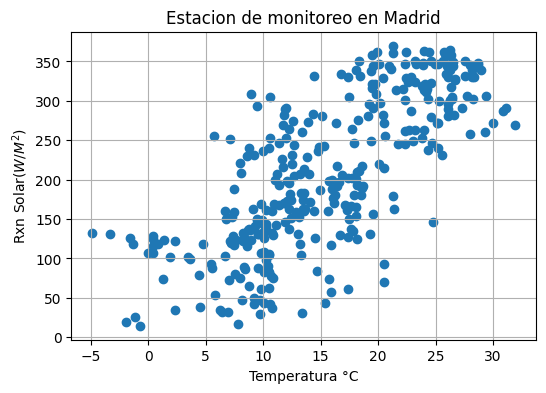

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

axes.scatter(temp_prom, rxn)
axes.set_xlabel("Temperatura °C")
axes.set_ylabel(r"Rxn Solar$(W/M^{2})$")
axes.set_title("Estacion de monitoreo en Madrid")
axes.grid(True)
plt.show()

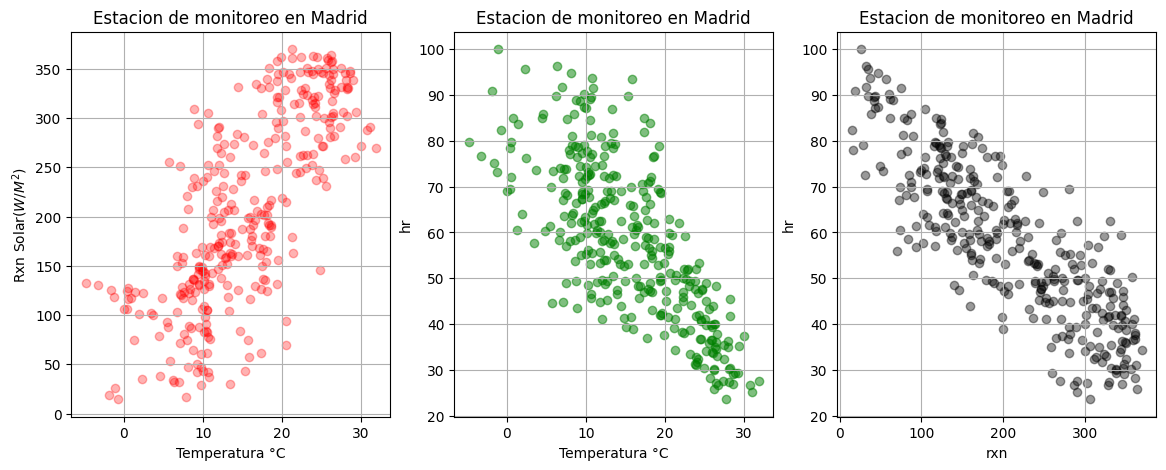

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
fig.subplots_adjust(hspace=0.06)

ax[0].scatter(temp_prom, rxn, c="r", alpha=0.3)
ax[0].set_xlabel("Temperatura °C")
ax[0].set_ylabel(r"Rxn Solar$(W/M^{2})$")
ax[0].set_title("Estacion de monitoreo en Madrid")
ax[0].grid(True)

ax[1].scatter(temp_prom, hr, c="green", alpha=0.5)
ax[1].set_xlabel("Temperatura °C")
ax[1].set_ylabel(r"hr")
ax[1].set_title("Estacion de monitoreo en Madrid")
ax[1].grid(True)

ax[2].scatter(rxn, hr, c="black", alpha=0.4)
ax[2].set_xlabel(r"rxn")
ax[2].set_ylabel("hr")
ax[2].set_title("Estacion de monitoreo en Madrid")
ax[2].grid(True)

## 3.2. Independencia de las observaciones

 Las observaciones deben ser independientes entre sí.

### Prueba de Durbin-Watson para la Independencia de las Observaciones

La prueba de Durbin-Watson es una prueba estadística que se utiliza para detectar la presencia de autocorrelación (correlación entre los errores de periodos de tiempo consecutivos) en los residuos de una regresión. El estadístico de Durbin-Watson ($d$) varía entre 0 y 4.

Para interpretar el resultado de manera formal, se compara el estadístico calculado con valores críticos en tablas de Durbin-Watson, considerando el número de observaciones y el número de predictores en el modelo. Sin embargo, una regla general práctica es:

*   $d \approx 2$: No hay autocorrelación.
*   $0 < d < 2$: Autocorrelación positiva.
*   $2 < d < 4$: Autocorrelación negativa.

In [ ]:
# Ajustar un modelo de regresión lineal simple
# Usaremos rxn_solar como predictor y temp_aire como variable de respuesta
model = smf.ols('temp_aire ~ rxn_solar', data=df_excel).fit()

# Obtener los residuos del modelo
residuals = model.resid

# Calcular el estadístico de Durbin-Watson
durbin_watson_statistic = sm.stats.durbin_watson(residuals)

print(f"Estadístico de Durbin-Watson: {durbin_watson_statistic}")

# Interpretación básica del resultado
if durbin_watson_statistic > 0 and durbin_watson_statistic < 2:
    print("Interpretación: El estadístico de Durbin-Watson sugiere una posible autocorrelación positiva en los residuos.")
elif durbin_watson_statistic > 2 and durbin_watson_statistic < 4:
    print("Interpretación: El estadístico de Durbin-Watson sugiere una posible autocorrelación negativa en los residuos.")
elif durbin_watson_statistic == 2:
    print("Interpretación: El estadístico de Durbin-Watson sugiere que no hay autocorrelación en los residuos.")
else:
    print("Interpretación: El estadístico de Durbin-Watson está fuera del rango típico [0, 4].")

Estadístico de Durbin-Watson: 0.47473562833718236
Interpretación: El estadístico de Durbin-Watson sugiere una posible autocorrelación positiva en los residuos.


### Análisis de Autocorrelación: Gráficos ACF y PACF de los Residuos

Para examinar la estructura de la autocorrelación en los residuos del modelo de regresión (`temp_aire` ~ `rxn_solar`), graficamos la Función de Autocorrelación (ACF) y la Función de Autocorrelación Parcial (PACF). Estos gráficos nos ayudan a identificar el orden de los procesos autorregresivos (AR) y de promedio móvil (MA) que podrían estar presentes en los residuos.

*   En el gráfico **ACF**, las barras que se extienden significativamente por encima o por debajo de las bandas de confianza azules indican autocorrelación en ese rezago. Un patrón de decaimiento lento en la ACF es característico de procesos AR.
*   En el gráfico **PACF**, las barras que se extienden significativamente por encima o por debajo de las bandas de confianza azules indican la correlación directa en ese rezago, eliminando la influencia de los rezagos intermedios. Un pico significativo en la PACF en un rezago particular, seguido de valores no significativos, es característico de procesos AR de ese orden.

### Implementación de un Modelo AR(1) para los Residuos

Dado que el análisis de los gráficos ACF y PACF sugirió que los residuos siguen un proceso autorregresivo de orden 1 (AR(1)), podemos ajustar un modelo AR(1) a estos residuos para modelar explícitamente la autocorrelación.

Un modelo AR(1) se define como: $e_t = c + \phi_1 e_{t-1} + u_t$, donde $e_t$ son los residuos en el tiempo $t$, $c$ es una constante, $\phi_1$ es el coeficiente autorregresivo de orden 1, y $u_t$ son errores de ruido blanco (independientes e idénticamente distribuidos).

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo AR(1) a los residuos
# El orden (p, d, q) para un modelo AR(1) es (1, 0, 0)
ar1_model = ARIMA(residuals, order=(1, 0, 0))
ar1_results = ar1_model.fit()

# Mostrar el resumen de los resultados del modelo AR(1)
print(ar1_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  334
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -871.902
Date:                Wed, 24 Sep 2025   AIC                           1749.805
Time:                        21:55:47   BIC                           1761.238
Sample:                             0   HQIC                          1754.363
                                - 334                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0774      0.764     -0.101      0.919      -1.574       1.420
ar.L1          0.7615      0.033     23.409      0.000       0.698       0.825
sigma2        10.8102      0.622     17.376      0.0

El resumen del modelo AR(1) proporciona información sobre el coeficiente autorregresivo ($\phi_1$) y su significancia estadística. Un coeficiente $\phi_1$ significativo y positivo (como esperábamos dada la autocorrelación positiva) confirma que los residuos en un momento dado están positivamente correlacionados con los residuos del período anterior.

Modelar la autocorrelación de esta manera nos permite entender mejor la estructura de los errores y es un paso hacia la construcción de un modelo que aborde la violación del supuesto de independencia.

Para el modelado final que relacione `temp_aire` y `rxn_solar`, podríamos considerar un modelo de regresión con errores AR(1) o un modelo ARIMAX que incluya `rxn_solar` como variable exógena, en lugar de un simple OLS sobre las variables originales sin corregir la autocorrelación.

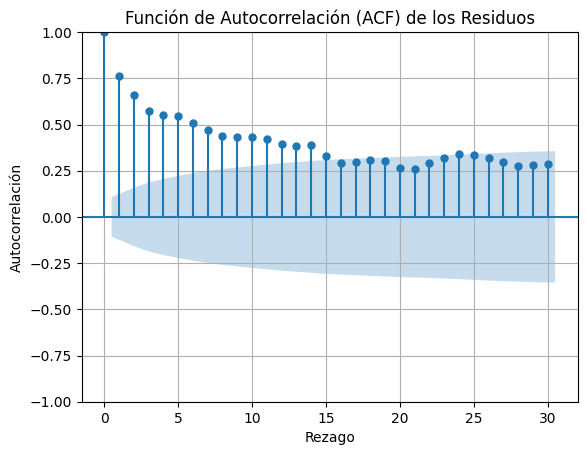

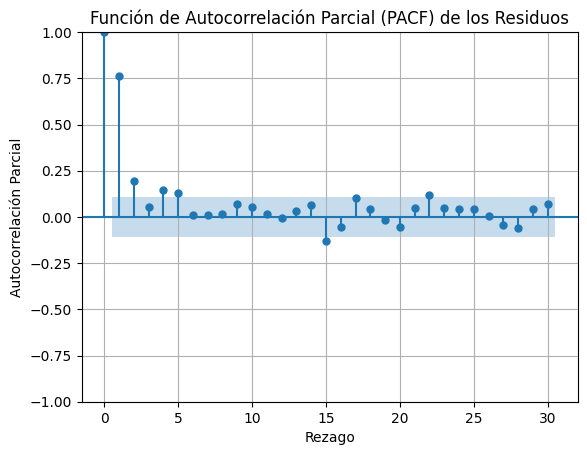

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la ACF de los residuos
fig_acf = plot_acf(residuals, lags=30)
plt.title("Función de Autocorrelación (ACF) de los Residuos")
plt.xlabel("Rezago")
plt.ylabel("Autocorrelación")
plt.grid(True)
plt.show()

# Graficar la PACF de los residuos
fig_pacf = plot_pacf(residuals, lags=30)
plt.title("Función de Autocorrelación Parcial (PACF) de los Residuos")
plt.xlabel("Rezago")
plt.ylabel("Autocorrelación Parcial")
plt.grid(True)
plt.show()

En este caso, un valor de 0.475 está notablemente por debajo de 2. Esto proporciona evidencia fuerte de que existe autocorrelación positiva en los residuos de este modelo de regresión simple (**`temp_aire`** ~ **`rxn_solar`**).

La presencia de autocorrelación positiva en los residuos viola el supuesto de independencia de las observaciones en la regresión lineal. Esto puede tener varias implicaciones, como:

* Los errores estándar de los coeficientes de regresión estarán subestimados, lo que hará que las pruebas de significancia (valores p) sean incorrectas y posiblemente lleve a conclusiones erróneas sobre la significancia de los predictores.

* Las predicciones del modelo podrían ser ineficientes.
Para abordar la autocorrelación, se podrían considerar métodos de modelado de series temporales o modelos de regresión que tengan en cuenta la estructura de los errores.

En resumen, el resultado de la prueba de Durbin-Watson (0.475) indica claramente que el supuesto de independencia de los residuos no se cumple para este modelo, sugiriendo una autocorrelación positiva significativa.

**Pregunta:**

Que métodos de modelado de series temporales o modelos de regresión que tengan en cuenta la estructura de los errores, se podria emplear sobre temp_aire y rxn_solar para atenuar sobreestimaciones y subestimaciones.

## 3.3. Homocedasticidad

La varianza de los errores debe ser constante a lo largo de todos los valores de $X$.

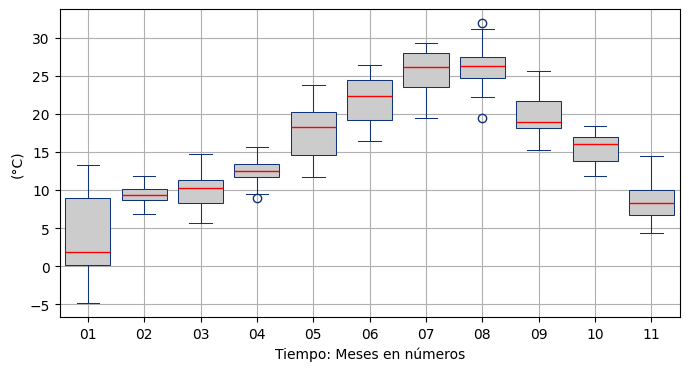

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.boxplot(x='mes_numero', y='temp_aire', data=df_excel,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},
            ax=axes,
            )
plt.xlabel("Tiempo: Meses en números")
plt.ylabel("(°C)")
plt.grid(True)

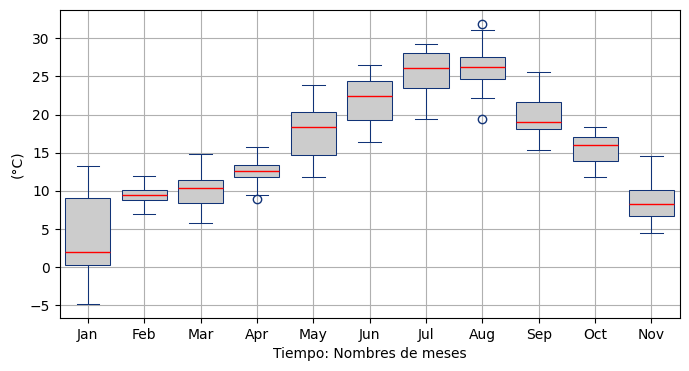

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.boxplot(x='mes_nombre', y='temp_aire', data=df_excel,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},
            ax=axes,
            )
plt.xlabel("Tiempo: Nombres de meses")
plt.ylabel("(°C)")
plt.grid(True)

Realizar graficas de diagrama de cajas usando las otras variables (humedad relativa y radiación solar)

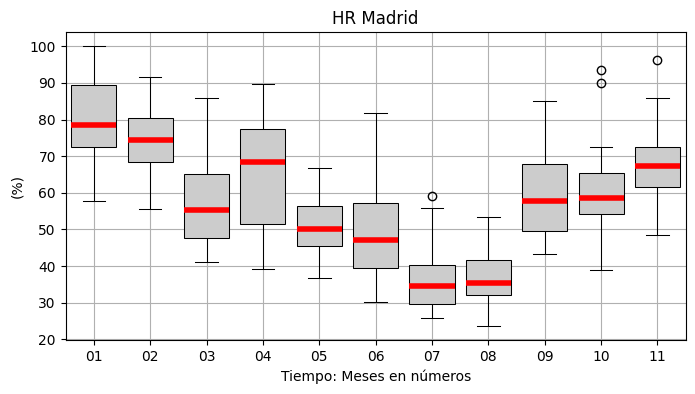

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.boxplot(x='mes_numero', y='hr', data=df_excel,
            fill=True, color=".8", linecolor="black",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 4},
            ax=axes,
            )
plt.xlabel("Tiempo: Meses en números")
plt.ylabel("(%)")
plt.title("HR Madrid")
plt.grid(True)

##  3.4. Normalidad de los residuos

Los errores deben seguir una distribución normal con media cero.

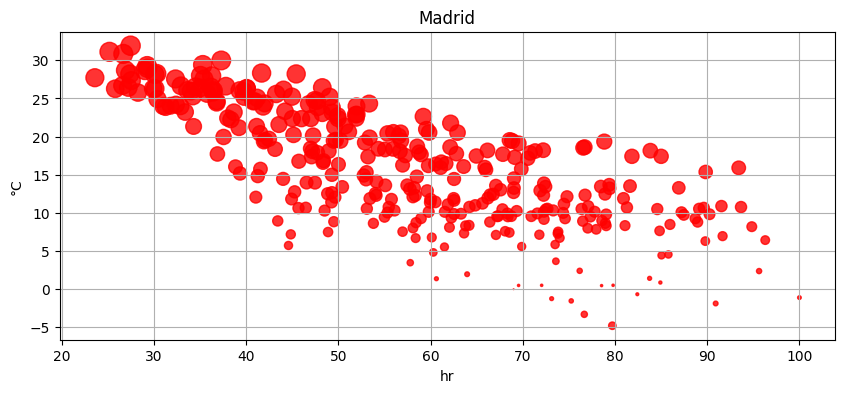

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

scatter = ax.scatter(df_excel["hr"], df_excel["temp_aire"], s=np.abs(df_excel["temp_aire"])*6, c="r" ,alpha=0.8)
ax.set_xlabel("hr")
ax.set_ylabel("°C")
ax.set_title('Madrid')
ax.grid(True)

plt.show()

##

## 3.5. Ausencia de valores atípicos

Los outliers pueden afectar significativamente el modelo

# **IV. Visualización de datos cualitativos**



La visualización de datos cualitativos se enfoca en representar información no numérica o categórica para comprender patrones, distribuciones y relaciones entre diferentes grupos o categorías. Aunque los datos cualitativos no tienen un valor numérico inherente, su visualización es crucial para comunicar ideas, comparar grupos y identificar tendencias en datos descriptivos. Python, a través de bibliotecas como Matplotlib y Seaborn, ofrece herramientas versátiles para este propósito.

**Tipos comunes de visualizaciones para datos cualitativos:**

*   **Gráficos de Barras:** Ideales para comparar la frecuencia o la proporción de diferentes categorías. Cada barra representa una categoría y su longitud indica la cantidad de observaciones en esa categoría.
<!--*   **Gráficos de Conteo (Count Plots):** Similar a los gráficos de barras, pero específicamente diseñados para mostrar el número de ocurrencias de cada categoría en una variable cualitativa.-->
*   **Gráficos de Pastel (Pie Charts):** Muestran la proporción de cada categoría en relación con el total. Son útiles para visualizar la composición de un conjunto de datos cualitativos.
*   **Diagramas de Caja (Box Plots):** Aunque se usan a menudo para datos cuantitativos, pueden ser útiles para visualizar la distribución de una variable cuantitativa dentro de diferentes categorías cualitativas.
<!--*   **Gráficos de Violín (Violin Plots):** Combinan la información de un diagrama de caja con una estimación de la densidad de probabilidad, mostrando la forma de la distribución de una variable cuantitativa para cada categoría cualitativa.
<!--*   **Mapas de Árbol (Treemaps):** Representan datos jerárquicos cualitativos utilizando rectángulos anidados, donde el tamaño de cada rectángulo corresponde a la proporción de la categoría.
<!--*   **Nubes de Palabras (Word Clouds):** Visualizan la frecuencia de palabras en un texto, donde el tamaño de cada palabra es proporcional a su aparición. Son útiles para identificar los términos más comunes en datos textuales.-->

Python permite personalizar estos gráficos con colores, etiquetas y otros elementos visuales para resaltar la información clave y facilitar la interpretación de los datos cualitativos.

In [ ]:
nombre_columnas = df_csv.columns.to_list()
print(nombre_columnas)

['Sexo', 'id_persona', 'Edad', 'Tipo_edad', 'id_ubigeo', 'Fecha_atencion', 'Etapa', 'Diagnostico', 'Tipo_Dx', 'Lab', 'id_eess']


In [ ]:
frecuencia_sexo = df_csv["Sexo"].value_counts()
print(frecuencia_sexo)

Sexo
M    126255
F    122638
Name: count, dtype: int64


In [ ]:
x = frecuencia_sexo.index
y = frecuencia_sexo.values

In [ ]:
print(x)

Index(['M', 'F'], dtype='object', name='Sexo')


In [ ]:
print(y)

[126255 122638]


## 4.1. Gráficas de barras

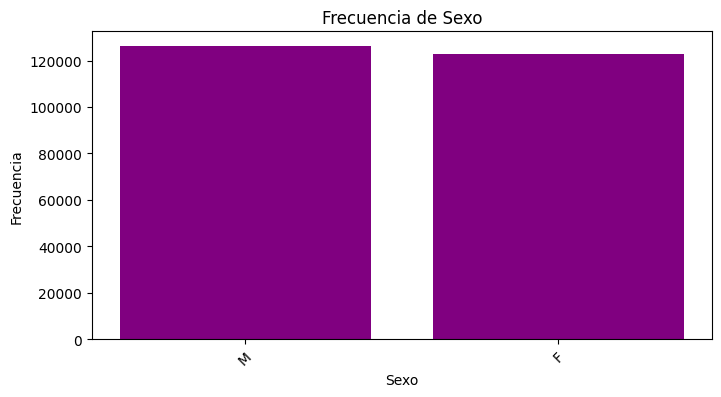

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
axes.bar(x, y, color="purple")
axes.tick_params(axis='x', rotation=45)

axes.set_ylabel("Frecuencia")
axes.set_xlabel("Sexo")
axes.set_title("Frecuencia de Sexo")
#axes.grid(True)
plt.show()

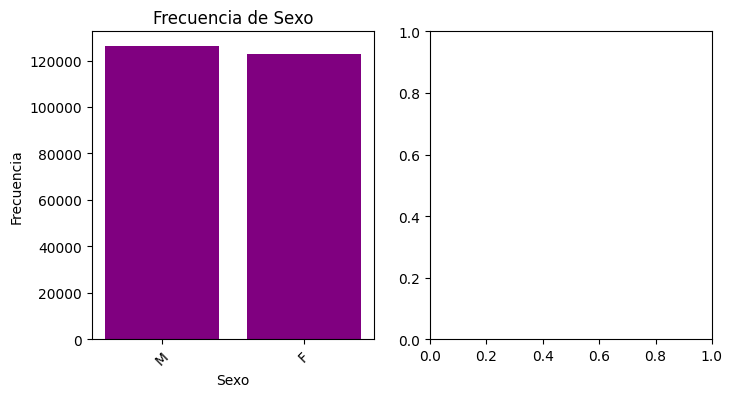

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].bar(x, y, color="purple")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel("Frecuencia")
axes[0].set_xlabel("Sexo")
axes[0].set_title("Frecuencia de Sexo")
#axes.grid(True)
plt.show()

##  4.2. Gráficos de Pastel

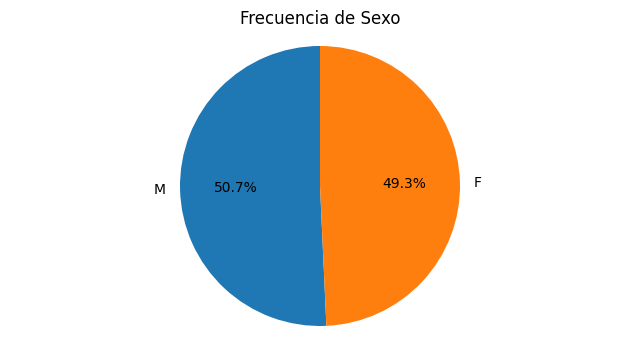

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

axes.pie(frecuencia_sexo, labels=x, autopct='%1.1f%%',  startangle=90)

axes.axis('equal')

axes.set_title("Frecuencia de Sexo")
plt.show()

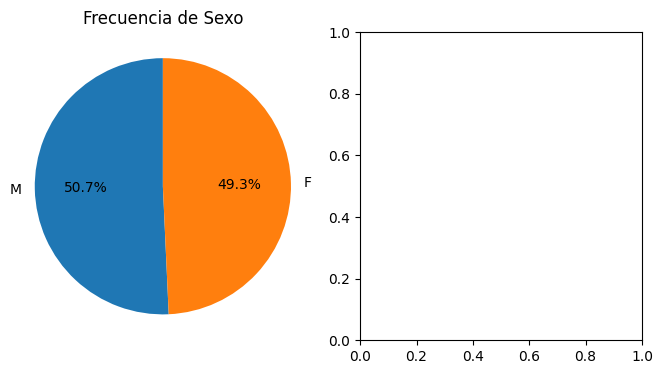

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].pie(frecuencia_sexo, labels=x, autopct='%1.1f%%',  startangle=90)

axes[0].axis('equal')
axes[0].set_title("Frecuencia de Sexo")


plt.show()

## 4.3. Diagramas de Caja (Box Plots)

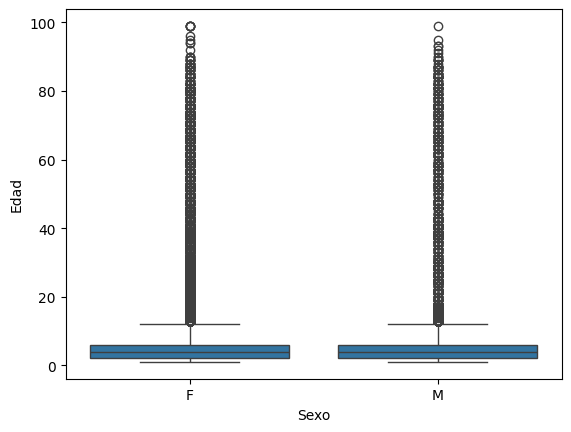

In [ ]:
sns.boxplot(x="Sexo", y="Edad", data=df_csv)
plt.show()

# **IV. Referencias**

**Libros y manuales**

- [Libro de estadisitica con python]( https://www.editorial-sciela.org/index.php/sciela/article/view/16/49)



- [Introducción a la teoria de probabilidades](https://ciladi.org/wp-content/uploads/Version_final_Introduccion-Probabilidad-Python-vf_Bayas-3.pdf)

  

- [Guía practica de análsis exploratorio de python](https://datos.gob.es/sites/default/files/doc/file/guia_eda_python.pdf)


**Cursos en linea**

- [Estadística W3School](https://www.w3schools.com/statistics/index.php)

- [Estadística con python](https://docs.python.org/es/3/library/statistics.html)

- [Kaggle](https://www.kaggle.com/code/saurav9786/statistics-for-data-scientists)

**Aplicaciones IA**

[Gemini iA](https://gemini.google.com), [DeepSeek](https://www.deepseek.com/), [Chat GPT](https://chatgpt.com/), [Claude IA](https://claude.ai/) y [Julius IA](https://julius.ai)

